# Chapter 1. Exploratory Data Analysis

In [1]:
import pandas as pd

Dataset used in this example is from a real bike-sharing service.

In this dataset, each row represents information about a particular hour between midnight on January 1, 2011, and 11:59 PM on December 31, 2012—more than 17,000 hours total. The rows are arranged in order. Each column contains a particular metric that has been measured for each of these hours.

In [2]:
hour = pd.read_csv('hour.csv')

## Analyzing Subsets of Data

In [3]:
print(hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  count  
0           1  0.24  0.2879  0.81        0.0       3          13     16  
1           1  0.22  0.2727  0.80        0.0       8          32     40  
2           1  0.22  0.2727  0.80        0.0       5          27     32  
3           1  0.24  0.2879  0.75        0.0       3          10     13  
4           1  0.24  0.2879  0.75        0.0       0           1      1  


In [4]:
print(hour['count'].mean())

189.46308763450142


In [5]:
print(hour['count'].median())

142.0


In [6]:
print(hour['count'].std())

181.38759909186527


In [7]:
print(hour['registered'].min())

0


In [8]:
print(hour['registered'].max())

886


**You should look at the output of describe() for every dataset you work with to make sure that all the values are at least plausible.**

In [9]:
print(hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [10]:
print(hour.loc[3, 'count']) # loc[<row>,<column>]

13


In [11]:
print(hour.loc[2:4, 'registered'])

2    27
3    10
4     1
Name: registered, dtype: int64


In [12]:
# Use logical condition with loc().
print(hour.loc[hour['hr'] < 5, 'registered'].mean())
print(hour.loc[(hour['hr'] < 5) & (hour['temp'] < .50), 'count'].mean())
print(hour.loc[(hour['hr'] < 5) & (hour['temp'] > .50), 'count'].mean())

20.7881427367238
19.521104742053154
33.639322916666664


In [13]:
print(hour.groupby(['season'])['count'].mean())

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64


In [14]:
print(hour.groupby(['season', 'holiday'])['count'].mean())

season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64


## Visualizing Data

**You should plot your data early and often every time you’re doing data analysis.**

In [3]:
import matplotlib.pyplot as plt

**Scatterplot is a good first plot to draw because it shows every observation in the data.**

Use `.scatter()` to draw scatter charts.

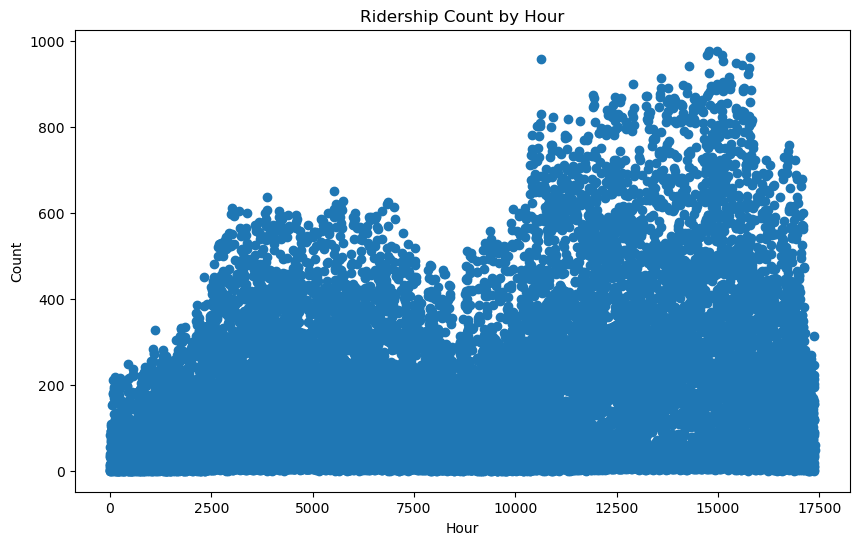

In [16]:
fig, ax = plt.subplots(figsize = (10, 6)) # width of 10 inches and height of 6 inches
ax.scatter(x = hour['instant'], y = hour['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour")
plt.show()

**When you have a big dataset, it’s a good idea to do both: plot the entire dataset at once (to understand the general, overall patterns) as well as plot smaller subsets of the data (to understand individual observations and smaller-scale patterns).**

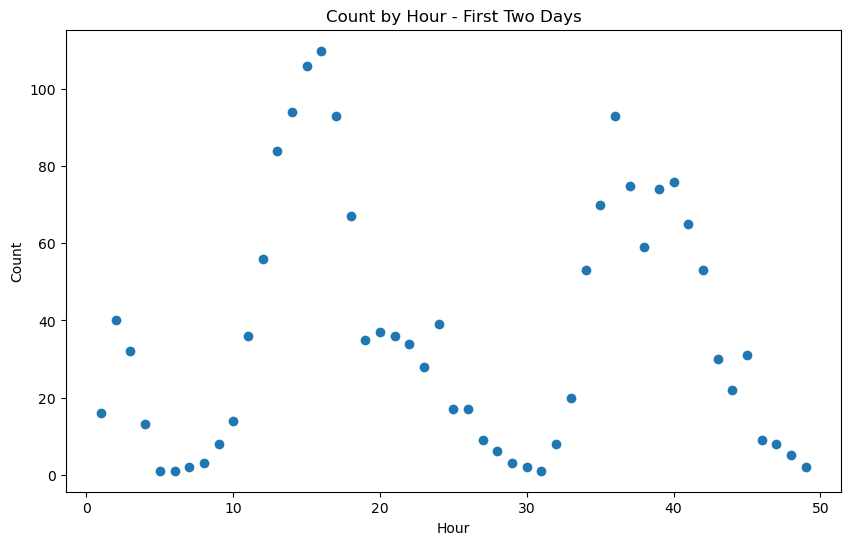

In [17]:
hour_first48 = hour.loc[0:48, :]
fig, ax = plt.subplots(figsize = (10, 6)) 
ax.scatter(x = hour_first48['instant'], y = hour_first48['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

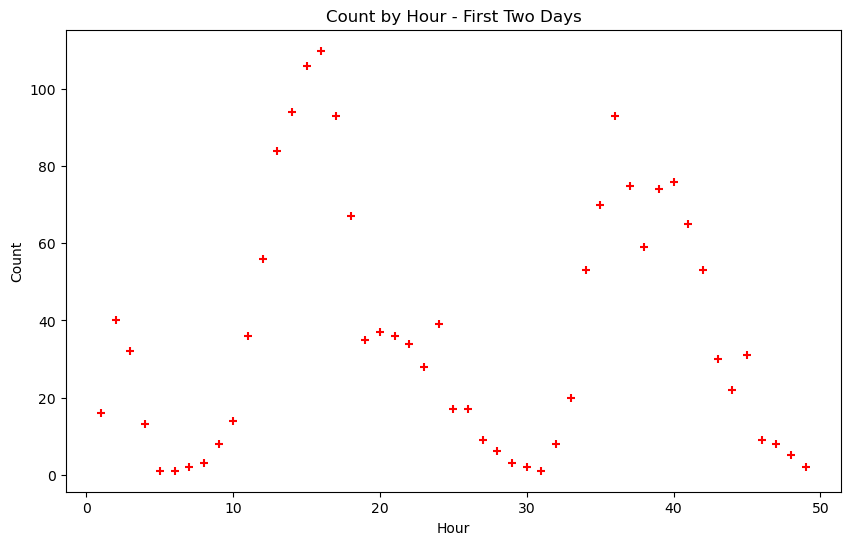

In [18]:
fig, ax = plt.subplots(figsize = (10, 6)) 
ax.scatter(x = hour_first48['instant'], y = hour_first48['count'], c = 'red', marker = "+") # c: color
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

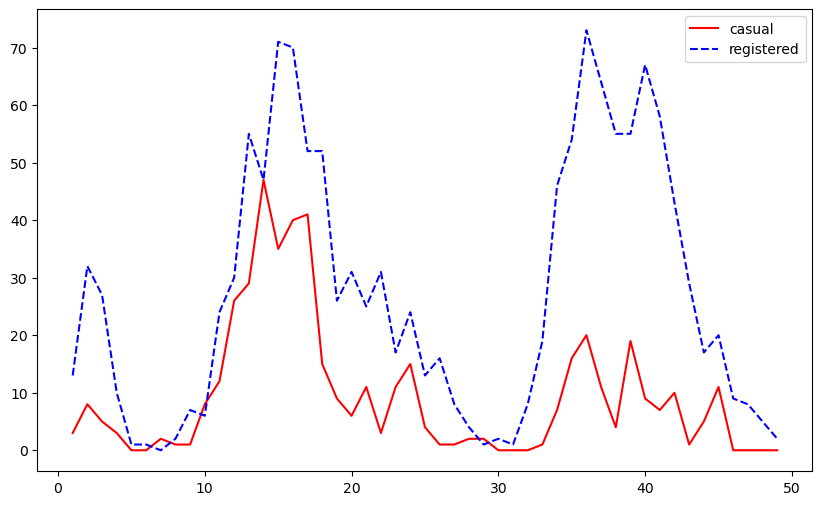

In [19]:
fig, ax = plt.subplots(figsize = (10, 6)) 
# Use .plot() to draw line charts.
ax.plot(hour_first48['instant'], hour_first48['casual'], c = 'red', label = 'casual', linestyle = '-')
ax.plot(hour_first48['instant'], hour_first48['registered'], c = 'blue', label = 'registered', linestyle = '--')
ax.legend()
plt.show()

In [4]:
import seaborn as sns

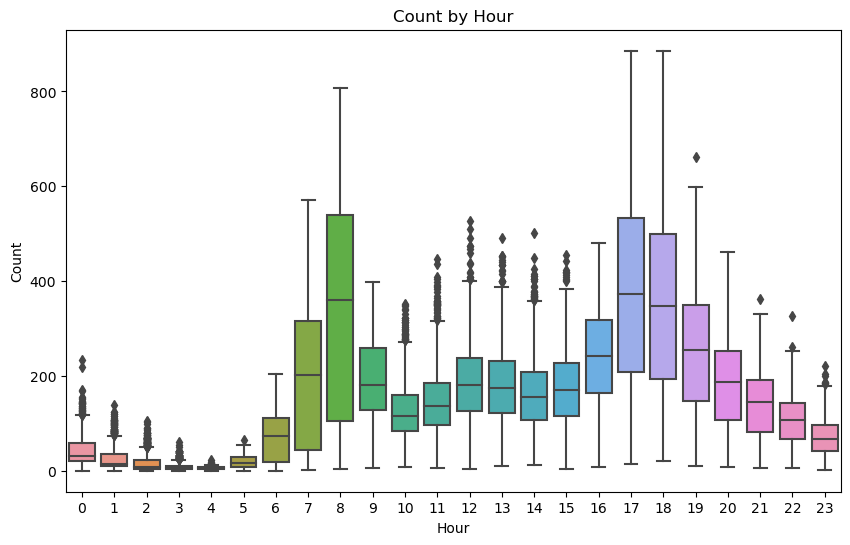

In [22]:
fig, ax = plt.subplots(figsize = (10, 6))
# Use .boxplot() to draw box charts. 
sns.boxplot(x = 'hr', y = 'registered', data = hour)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour")
plt.show()

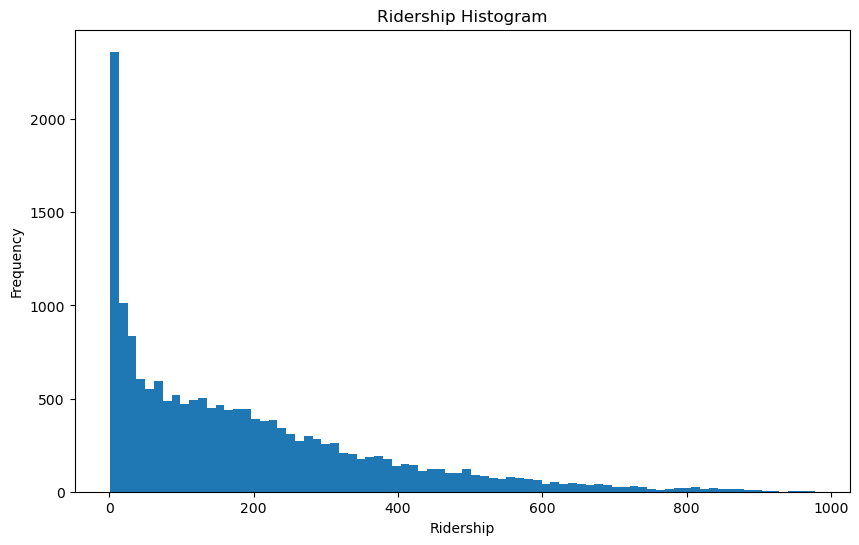

In [28]:
fig, ax = plt.subplots(figsize = (10, 6))
# Use .hist() to draw histograms.
ax.hist(hour['count'], bins = 80) # bins: number of bars in the chart
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.title("Ridership Histogram")
plt.show()

The above histogram indicates a common pattern for businesses: many hours have few customers, and few hours have many customers.

This kind of histogram could be used to think about the capacity of the company.

C:\devTools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


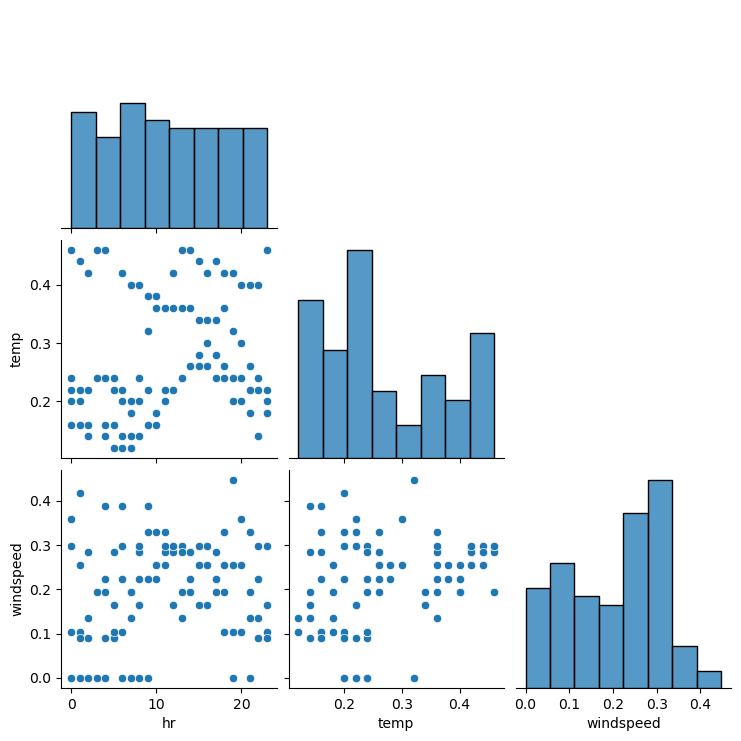

In [29]:
the_variables = ['hr', 'temp', 'windspeed']
hour_first100 = hour.loc[0:100, the_variables]
# Use .pairplot() to draw every possible scatterplot for every possible pair of variables in the dataset as well as histograms for the individual variables.
sns.pairplot(hour_first100, corner = True) # corner: If True, don’t add axes to the upper (off-diagonal) triangle of the grid, making this a “corner” plot.
plt.show()

The above scatterplots don’t show much apparent relationship among the variables.

## Exploring Correlations

Variables could be positively or negatively correlated.

The most commonly used correlation coefficient is *Pearson correlation coefficient*, which is used by `.corr()` by default.

The Pearson correlation coefficient is a number that’s always between –1 and 1, and it’s often named with the variable `r`.

- If r > 0, then positively correlated.
- If r < 0, then negatively correlated.
- If r = 0, then uncorrelated.

-1 (strong correlation) ~ 0 (weak) ~ 1 (strong)

strong correlation = less noise = less randomness = more predictability = more accuracy

**Correlation does not necessarily imply causation.**

In [5]:
print(hour['casual'].corr(hour['registered']))
print(hour['temp'].corr(hour['hum']))

0.5066177004294637
-0.06988139105119355


**Creating a correlation matrix can be a quick, simple way to find correlations among all the variables in your data and find any surprising positive or negative correlations.**

In [6]:
the_names = ['hr', 'temp', 'windspeed']
# Create a correlation matrix.
cor_matrix = hour[the_names].corr()
print(cor_matrix)

                 hr      temp  windspeed
hr         1.000000  0.137603   0.137252
temp       0.137603  1.000000  -0.023125
windspeed  0.137252 -0.023125   1.000000


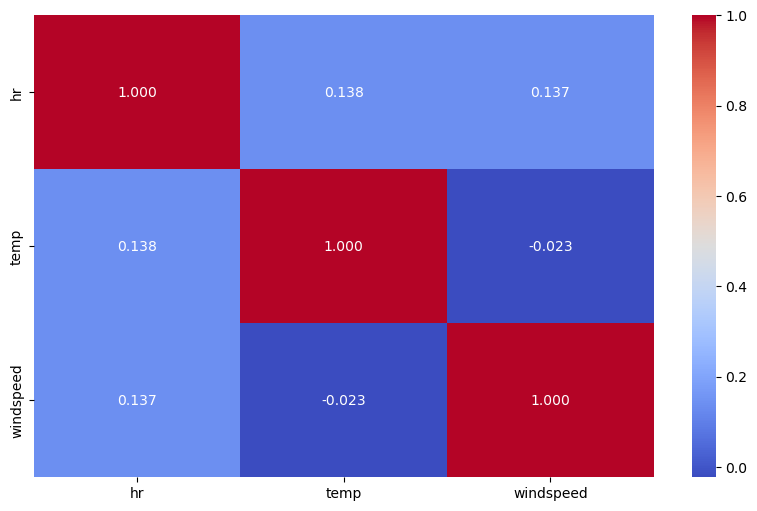

In [12]:
plt.figure(figsize = (10, 6))
cor_matrix = hour[the_names].corr()
# Use .heatmap() to draw heat maps.
# cmap: color map
# annot: If True, write the data value in each cell.
# fmt: format of annotations 
sns.heatmap(cor_matrix, annot = True, cmap = 'coolwarm', fmt = '.3f', xticklabels = the_names, yticklabels = the_names) 
plt.show()

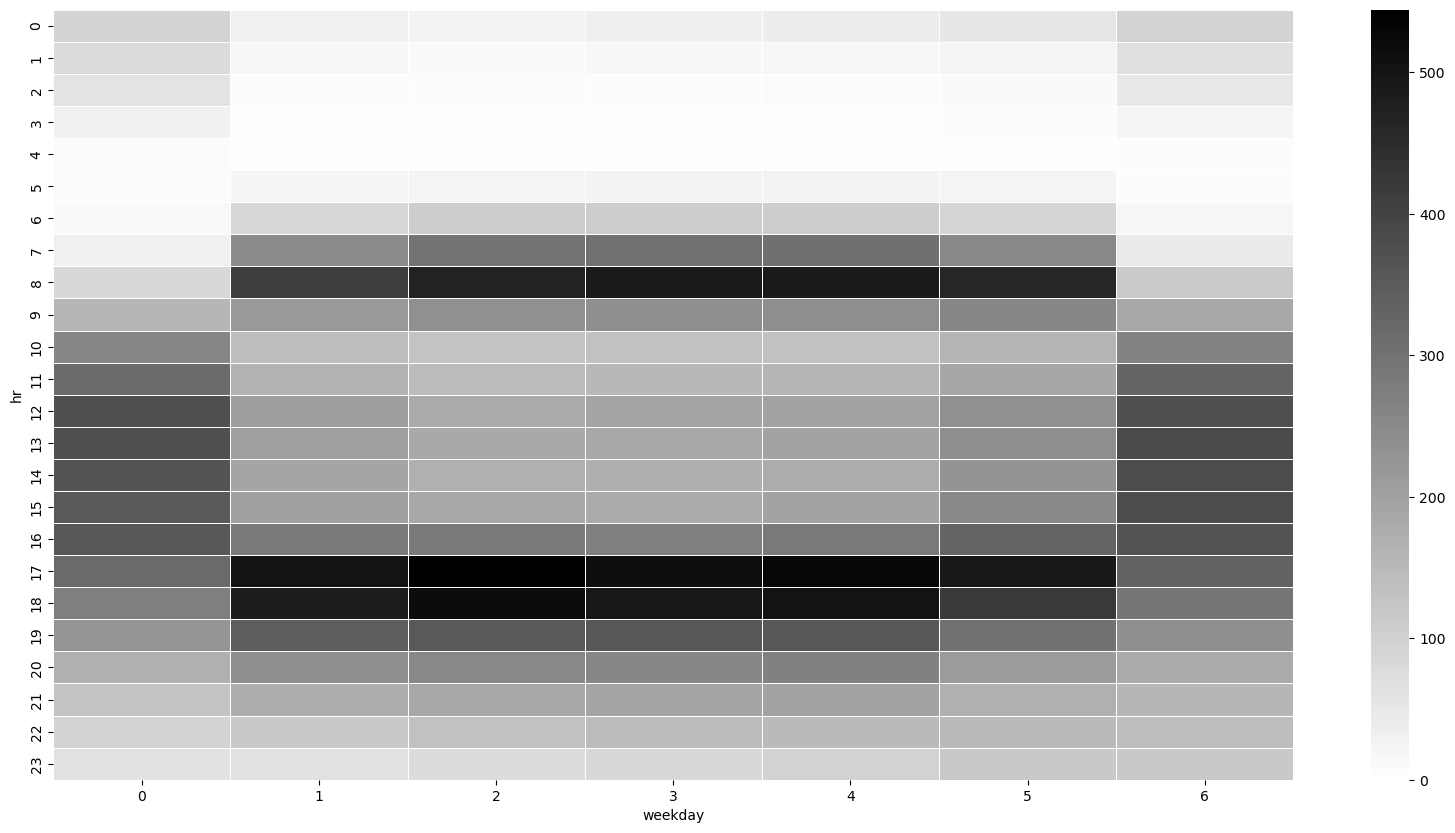

In [24]:
# Draw a heat map showing the number of riders at each hour throughout a week:
# Create a pivot table.
df_heatmap = hour.pivot_table(index = 'hr', columns = 'weekday', values = 'count')
# Draw a heat map.
plt.figure(figsize = (20, 10))
# linewidths: width of the lines that will divide each cell
# vmin: minimum value to anchor the colormap
sns.heatmap(df_heatmap, cmap = 'binary', linewidths = .5, vmin = 0)
plt.show()